First we try to solve the system by using the combination of Gauss-Jordan and matrices:

In [23]:
import numpy as np

A = np.array([[1,-3,2,1], [2,1,-1,1], [4,-1,3,11]])
print(A)

[[ 1 -3  2  1]
 [ 2  1 -1  1]
 [ 4 -1  3 11]]


In [24]:
U_1 = np.array([[1, 0, 0], [-2, 1, 0], [-4, 0, 1]])
A_1 = U_1@A
print(A_1)

[[ 1 -3  2  1]
 [ 0  7 -5 -1]
 [ 0 11 -5  7]]


In [25]:
U_2 = np.array([[-7, -3, 0], [0, 1, 0], [0, 11, -7]])
A_2 = U_2@A_1
print(A_2)

[[ -7   0   1  -4]
 [  0   7  -5  -1]
 [  0   0 -20 -60]]


In [26]:
U_3 = np.array([[20, 0, 1], [0, -20, 5], [0, 0, 1]])
A_3 = U_3@A_2
print(A_3)

[[-140    0    0 -140]
 [   0 -140    0 -280]
 [   0    0  -20  -60]]


In [27]:
U_4 = np.array([[1/-140, 0, 0], [0, 1/-140, 0], [0, 0, 1/-20]])
A_4 = U_4@A_3
print(A_4)

[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]]


Now the combination of things:

In [28]:
U = U_4@U_3@U_2@U_1
print(U)

[[ 0.1   0.35  0.05]
 [-0.5  -0.25  0.25]
 [-0.3  -0.55  0.35]]


We can use the matrix U to get the result immediately, but it's still a bit tricky to calculate the matrix U

In [29]:
A_Koef = np.array([[1, -3, 2], [2, 1, -1], [4, -1, 3]])
print(A_Koef)
print(U@A)

[[ 1 -3  2]
 [ 2  1 -1]
 [ 4 -1  3]]
[[ 1.00000000e+00 -1.73472348e-16  1.31838984e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  1.00000000e+00  3.00000000e+00]]


For this reason, we have what we call the inverse of the matrix

In [30]:
A_Koef_inv = np.linalg.inv(A_Koef)
print(A_Koef_inv)
print("---")
print(U)

[[ 0.1   0.35  0.05]
 [-0.5  -0.25  0.25]
 [-0.3  -0.55  0.35]]
---
[[ 0.1   0.35  0.05]
 [-0.5  -0.25  0.25]
 [-0.3  -0.55  0.35]]


Results in the fact:
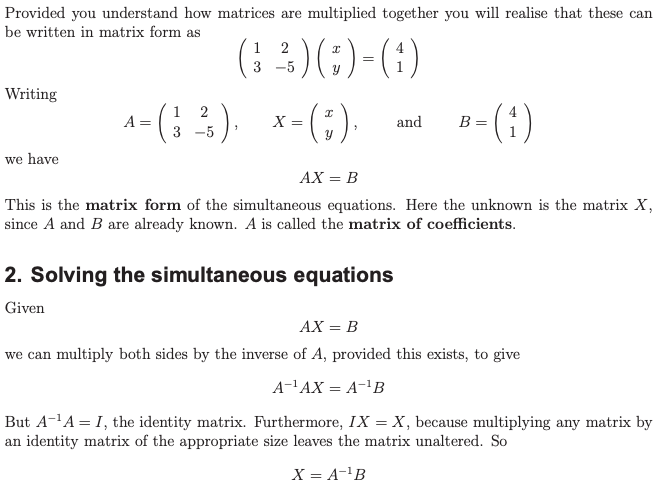

In [31]:
print(A_Koef_inv@np.array([[1], [1], [11]]))

[[1.]
 [2.]
 [3.]]


In [33]:
s = 1
A_Koef = np.array([[1, 0, s], [2, s, 0], [1, s, 1]])

A_det = np.linalg.det(A_Koef)
print(A_det)

A_Koef_inv = np.linalg.inv(A_Koef)

print(A_Koef_inv@np.array([[0], [1], [1]]))

2.0
[[0.]
 [1.]
 [0.]]


In [37]:
import sympy as sym

s = sym.Symbol('s')
A_Koef = sym.Matrix([[1, 0, s], [2, s, 0], [1, s, 1]])

A_det = A_Koef.det()
print("Determinant: ", A_det)

A_Koef_inv = A_Koef.inv()
print("Inverse: ", A_Koef_inv)

print(A_Koef_inv*sym.Matrix([[0], [1], [1]]))

print(A_Koef_inv*sym.Matrix([[0], [1], [1]]).subs(s, 1))

Determinant:  s**2 + s
Inverse:  Matrix([[s/(s**2 + s), s**2/(s**2 + s), -s**2/(s**2 + s)], [-2/(s**2 + s), (1 - s)/(s**2 + s), 2/(s + 1)], [s/(s**2 + s), -s/(s**2 + s), s/(s**2 + s)]])
Matrix([[0], [(1 - s)/(s**2 + s) + 2/(s + 1)], [0]])
Matrix([[0], [(1 - s)/(s**2 + s) + 2/(s + 1)], [0]])
